<a href="https://colab.research.google.com/github/yanxinhan98/MSAI-339-Data-Science-Seminar/blob/main/Copy_of_diabetes_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes EDA and ML Prep

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

You will perform EDA and prepare (fill in missing values, transform, scale) the dataset for modeling.  Finally, you'll use logistic regression to evaluate how your transformation of the data improved the prediction on Outcome.

---

There are 9 columns
* Pregnancies - Number of times pregnant
* Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mm Hg)
* SkinThickness - Triceps skin fold thickness (mm)
* Insulin - 2-Hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age (years)
* Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0  

---

Grading:  
* Coding style and linear flow.  Can we examine the graphs and read the analysis end-to-end to understand the analysis and choices made. - 2 Points
* EDA - View the histogram for each variable.  Look at the correlations between all variables.  Observe / analyse interesting relationships between the variables - 3 Points
* Model prep - For each column, were your assumptions and technique chosen to fill in missing data, transform or scale correct and supported. - 8 Points (1 for each column)
* Model eval - How did the logistic regression perform compared to the baseline.  How well did the student assess the performance, including assessing if there was data "leakage"  - 2 Points



In [ ]:
#@title Functions to split and model dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

def get_train_test(df):
  return train_test_split(df.loc[:, df.columns != "Outcome"], df["Outcome"], test_size = .3, random_state=77)


def score_data(scored_df_):
  X_train, X_test, y_train, y_test = get_train_test(scored_df_)
  model = LogisticRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  return confusion_matrix(y_test, predictions, labels=model.classes_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


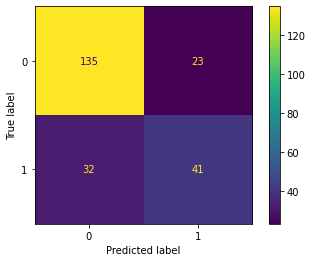

In [ ]:
#@title Loading the data and establishing the baseline
df = pd.read_csv('https://raw.githubusercontent.com/brook-miller/msai339-students/main/3-homework/diabetes.csv')
cm = score_data(df)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#EDA

#Model
How did your preparation of the data impact the LogisticRegression model?

Compare the initial confusion matrix to the confusion matrix after you have completed EDA and preparation.

# Leakage Assessment

Can you describe in what ways your data preparation might be "leaking" information from the training data to the test data
